In [1]:
import datetime
print(f"{datetime.datetime.now().strftime('%d-%m-%y %H:%M:%S')}")

05-11-23 14:53:48


# Data Loading

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('pokemon_alopez247.csv')

# Data exploration

In [4]:
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [5]:
print(f"Number of attributes(columns) present in the dataset : {df.shape[1]}")
print(f"Number of instances(rows) present in the dataset : {df.shape[0]}")

Number of attributes(columns) present in the dataset : 23
Number of instances(rows) present in the dataset : 721


In [6]:
# Statistical analysis of the data
df.describe()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,644.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.553377,1.144979,56.773370,100.246879
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.199969,1.044369,89.095667,76.573513
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.400000,61.000000,180.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    object 
 3   Type_2            350 non-null    object 
 4   Total             721 non-null    int64  
 5   HP                721 non-null    int64  
 6   Attack            721 non-null    int64  
 7   Defense           721 non-null    int64  
 8   Sp_Atk            721 non-null    int64  
 9   Sp_Def            721 non-null    int64  
 10  Speed             721 non-null    int64  
 11  Generation        721 non-null    int64  
 12  isLegendary       721 non-null    bool   
 13  Color             721 non-null    object 
 14  hasGender         721 non-null    bool   
 15  Pr_Male           644 non-null    float64
 16  Egg_Group_1       721 non-null    object 
 1

In [8]:
df.isnull().sum()

Number                0
Name                  0
Type_1                0
Type_2              371
Total                 0
HP                    0
Attack                0
Defense               0
Sp_Atk                0
Sp_Def                0
Speed                 0
Generation            0
isLegendary           0
Color                 0
hasGender             0
Pr_Male              77
Egg_Group_1           0
Egg_Group_2         530
hasMegaEvolution      0
Height_m              0
Weight_kg             0
Catch_Rate            0
Body_Style            0
dtype: int64

In [9]:
print(f"Number of instances with legendary as 'True': {df[df['isLegendary']==True].shape[0]}")
print(f"Number of instances with legendary as 'False': {df[df['isLegendary']==False].shape[0]}")

Number of instances with legendary as 'True': 46
Number of instances with legendary as 'False': 675


### Observations:
1. It can be clearly inferred that the dataset is highly imbalanced. The number of instances with legendary value as False is a lot more than the number of instances with legendary value as True. This class imbalance would affect the model's ability to generalize, because it might become biased to the majority class (False class). Even though, it might show good accuracy when trained on imbalanced dataset, it would fail to predict the minority class. Hence  the dataset has to be balanced first, so that our model would perform well for both the classes.
   
2. The dataset consists of a lot features/attributes which may/may not influence the target variable. Hence, it is necessary to find the feature importance and select only those, which are necessary.
   
3. It also consists of null/missing values in some of the attributes. For each attribute, missing values have to be handled in a different way. For 'Type_2' and 'Egg_Group_2', we can fill the null values with 'None', whereas for 'Pr_Male', we can replace the null values with the mean of the numerical values present in that column.


# Data preprocessing

### Steps involved in preprocessing:
1. Creating a Balanced dataset
2. Handling the missing/Null values
3. Feature selection
4. Handling categorical features (One-Hot encoding for nominal categorical features, Label encoding for ordinal categorical features)
5. Handling numerical features (Normalization)
6. Creating Training and Testing splits

In [10]:
# Dataframe in which isLegendary=True
true_class = df[df['isLegendary']==True]
true_class

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
143,144,Articuno,Ice,Flying,580,90,85,100,95,125,...,Blue,False,NaN,Undiscovered,NaN,False,1.70,55.4,3,two_wings
144,145,Zapdos,Electric,Flying,580,90,90,85,125,90,...,Yellow,False,NaN,Undiscovered,NaN,False,1.60,52.6,3,two_wings
145,146,Moltres,Fire,Flying,580,90,100,90,125,85,...,Yellow,False,NaN,Undiscovered,NaN,False,2.01,60.0,3,two_wings
149,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,...,Purple,False,NaN,Undiscovered,NaN,True,2.01,122.0,3,bipedal_tailed
242,243,Raikou,Electric,NaN,580,90,85,75,115,100,...,Yellow,False,NaN,Undiscovered,NaN,False,1.91,178.0,3,quadruped
243,244,Entei,Fire,NaN,580,115,115,85,90,75,...,Brown,False,NaN,Undiscovered,NaN,False,2.11,198.0,3,quadruped
244,245,Suicune,Water,NaN,580,100,75,115,90,115,...,Blue,False,NaN,Undiscovered,NaN,False,2.01,187.0,3,quadruped
248,249,Lugia,Psychic,Flying,680,106,90,130,90,154,...,White,False,NaN,Undiscovered,NaN,False,5.21,216.0,3,two_wings
249,250,Ho-Oh,Fire,Flying,680,106,130,90,110,154,...,Red,False,NaN,Undiscovered,NaN,False,3.81,199.0,3,two_wings
376,377,Regirock,Rock,NaN,580,80,100,200,50,100,...,Brown,False,NaN,Undiscovered,NaN,False,1.70,230.0,3,bipedal_tailless


In [11]:
# Dataframe in which isLegendary=False
false_class = df[df['isLegendary']==False]
false_class

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,711,Gourgeist,Ghost,Grass,494,65,90,122,58,75,...,Brown,True,0.500,Amorphous,NaN,False,1.70,39.0,60,head_base
711,712,Bergmite,Ice,NaN,304,55,69,85,32,35,...,Blue,True,0.500,Monster,NaN,False,0.99,99.5,190,quadruped
712,713,Avalugg,Ice,NaN,514,95,117,184,44,46,...,Blue,True,0.500,Monster,NaN,False,2.01,505.0,55,quadruped
713,714,Noibat,Flying,Dragon,245,40,30,35,45,40,...,Purple,True,0.500,Flying,NaN,False,0.51,8.0,190,two_wings


In [12]:
# Performing undersampling of the majority class (False_class), so that both the classes have equal samples
from sklearn.utils import resample

# Number of samples
desired_samples = len(true_class)

# Randomly selecting a subset of samples from the majority class (False_class)
false_class_undersampled = resample(false_class, n_samples=desired_samples, replace=False)

# Concatenating the balanced classes
df_balanced = pd.concat([true_class, false_class_undersampled])

# Shuffling the balanced dataset.
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)


In [13]:
df_balanced

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,93,Haunter,Ghost,Poison,405,45,50,45,115,55,...,Purple,True,0.5,Amorphous,NaN,False,1.60,0.1,90,head_arms
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,...,Yellow,False,NaN,Undiscovered,NaN,False,1.60,52.6,3,two_wings
2,383,Groudon,Ground,NaN,670,100,150,140,100,90,...,Red,False,NaN,Undiscovered,NaN,False,3.51,950.0,3,bipedal_tailed
3,146,Moltres,Fire,Flying,580,90,100,90,125,85,...,Yellow,False,NaN,Undiscovered,NaN,False,2.01,60.0,3,two_wings
4,481,Mesprit,Psychic,NaN,580,80,105,105,105,105,...,Pink,False,NaN,Undiscovered,NaN,False,0.30,0.3,3,bipedal_tailed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,245,Suicune,Water,NaN,580,100,75,115,90,115,...,Blue,False,NaN,Undiscovered,NaN,False,2.01,187.0,3,quadruped
88,568,Trubbish,Poison,NaN,329,50,50,62,40,62,...,Green,True,0.5,Mineral,NaN,False,0.61,31.0,190,bipedal_tailless
89,488,Cresselia,Psychic,NaN,600,120,70,120,75,130,...,Yellow,True,0.0,Undiscovered,NaN,False,1.50,85.6,3,serpentine_body
90,721,Volcanion,Fire,Water,600,80,110,120,130,90,...,Brown,False,NaN,Undiscovered,NaN,False,1.70,195.0,3,quadruped


In [14]:
print(f"Number of samples with Legendary as 'True' (in balanced dataset): {df_balanced[df_balanced['isLegendary']==True].shape[0]}")
print(f"Number of samples with Legendary as 'False' (in balanced dataset): {df_balanced[df_balanced['isLegendary']==False].shape[0]}")

Number of samples with Legendary as 'True' (in balanced dataset): 46
Number of samples with Legendary as 'False' (in balanced dataset): 46


In [15]:
# Handling the missing values
df_balanced['Type_2'].fillna("None",inplace=True)
df_balanced['Egg_Group_2'].fillna("None",inplace=True)
df_balanced['Pr_Male'].fillna(df['Pr_Male'].mean(),inplace=True)

In [16]:
df_balanced.isnull().sum()

Number              0
Name                0
Type_1              0
Type_2              0
Total               0
HP                  0
Attack              0
Defense             0
Sp_Atk              0
Sp_Def              0
Speed               0
Generation          0
isLegendary         0
Color               0
hasGender           0
Pr_Male             0
Egg_Group_1         0
Egg_Group_2         0
hasMegaEvolution    0
Height_m            0
Weight_kg           0
Catch_Rate          0
Body_Style          0
dtype: int64

In [17]:
# Features --> X
# Dropping 'Name' and 'Number' as they are insignificant and do not influence the target variable (isLegendary)
# In other words, Name and Number(id) of the pokemon do not determine whether it is legendary or not.
X = df_balanced.drop(['isLegendary','Name','Number'],axis=1)

# Label --> y
y = df_balanced['isLegendary'].values

In [18]:
X.head()

,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,Ghost,Poison,405,45,50,45,115,55,95,1,Purple,True,0.500000,Amorphous,None,False,1.60,0.1,90,head_arms
1,Electric,Flying,580,90,90,85,125,90,100,1,Yellow,False,0.553377,Undiscovered,None,False,1.60,52.6,3,two_wings
2,Ground,None,670,100,150,140,100,90,90,3,Red,False,0.553377,Undiscovered,None,False,3.51,950.0,3,bipedal_tailed
3,Fire,Flying,580,90,100,90,125,85,90,1,Yellow,False,0.553377,Undiscovered,None,False,2.01,60.0,3,two_wings
4,Psychic,None,580,80,105,105,105,105,80,4,Pink,False,0.553377,Undiscovered,None,False,0.30,0.3,3,bipedal_tailed


In [19]:
y[:10]

array([False,  True,  True,  True,  True, False,  True, False, False,
       False])

In [20]:
X.shape, y.shape

((92, 20), (92,))

In [21]:
# One-hot encoding the categorical features (Since, the categorical features are nominal)
X = pd.get_dummies(X)
X.head()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,hasGender,Pr_Male,...,Body_Style_head_arms,Body_Style_head_base,Body_Style_head_only,Body_Style_insectoid,Body_Style_multiple_bodies,Body_Style_quadruped,Body_Style_serpentine_body,Body_Style_several_limbs,Body_Style_two_wings,Body_Style_with_fins
0,405,45,50,45,115,55,95,1,True,0.500000,...,True,False,False,False,False,False,False,False,False,False
1,580,90,90,85,125,90,100,1,False,0.553377,...,False,False,False,False,False,False,False,False,True,False
2,670,100,150,140,100,90,90,3,False,0.553377,...,False,False,False,False,False,False,False,False,False,False
3,580,90,100,90,125,85,90,1,False,0.553377,...,False,False,False,False,False,False,False,False,True,False
4,580,80,105,105,105,105,80,4,False,0.553377,...,False,False,False,False,False,False,False,False,False,False


In [22]:
# Normalizing the numercial features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [23]:
X[:5]

array([[3.70000000e-01, 1.76706827e-01, 2.90322581e-01, 2.05128205e-01,
        7.08955224e-01, 1.71428571e-01, 5.66929134e-01, 0.00000000e+00,
        1.00000000e+00, 5.00000000e-01, 0.00000000e+00, 1.55728587e-01,
        0.00000000e+00, 3.45238095e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.000000

In [24]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [25]:
X_train.shape, y_train.shape

((64, 91), (64,))

In [26]:
X_test.shape, y_test.shape

((28, 91), (28,))

# KNN Model

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [28]:
y_pred = knn_model.predict(X_test)

In [29]:
y_pred

array([ True, False,  True,  True, False,  True,  True, False, False,
        True, False,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True, False,  True, False, False, False, False,
       False])

In [30]:
y_test

array([ True, False,  True,  True, False,  True,  True, False, False,
        True, False,  True,  True,  True, False,  True, False,  True,
       False,  True,  True, False,  True, False, False, False, False,
       False])

### Evaluating the KNN Model
To evaluate the KNN Model, following evaluation metrics can be used:
1. Accuracy
2. Precision
3. Recall
4. F1 Score
5. Confusion Matrix
6. ROC Curve

Reference: 
https://developers.google.com/machine-learning/crash-course/classification/accuracy

Accuracy: 0.96
Precision: 0.93
Recall: 1.0
F1 score: 0.97
Confusion Matrix:



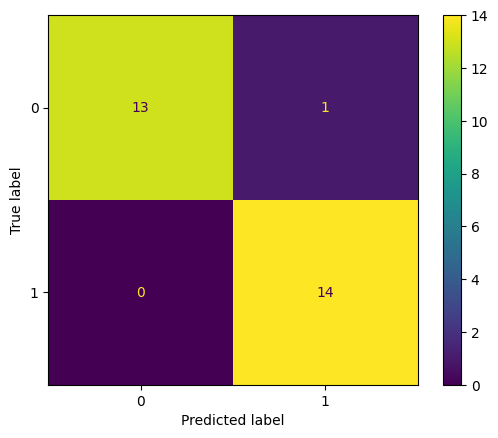

ROC Curve:



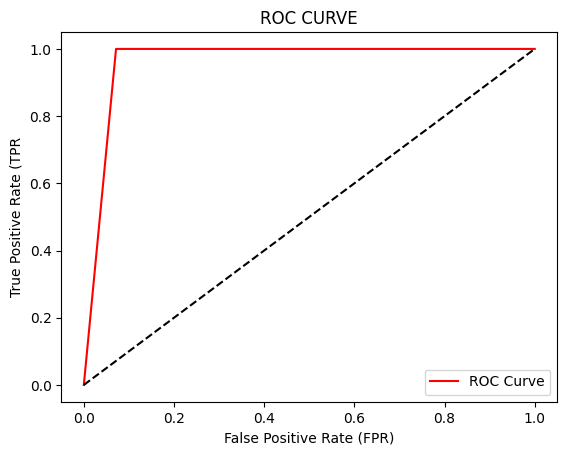

In [31]:
from sklearn.metrics import accuracy_score, precision_score,f1_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, roc_curve, roc_auc_score
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test,y_pred)
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test,y_pred)
print(f"Recall: {recall}")

f1 = f1_score(y_test,y_pred)
print(f"F1 score: {f1:.2f}")

cm = confusion_matrix(y_test,y_pred)
cm_disp = ConfusionMatrixDisplay(cm)
print("Confusion Matrix:\n")
cm_disp.plot()
plt.show()

print("ROC Curve:\n")
fpr,tpr,thresholds = roc_curve(y_test, y_pred)
roc_auc_score = roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,label='ROC Curve',color='r')
plt.plot([0,1],[0,1],"k--")
plt.title("ROC CURVE")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR")
plt.legend()
plt.show()